In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats as st
from census import Census
from config import api_key
c = Census(api_key, year=2017)
#!pip install census
Medicare_file = "medicare_charges.csv"

In [2]:
census_data = c.acs5.get(("NAME", "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E",
                         "B25077_001E",
                         "B15003_022E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "B25077_001E": "Median Home Value",
                                      "B15003_022E": "Bachelor Count",
                                      "NAME": "Name", "zip code tabulation area": "Zip Code"})
Census_Cleaned = census_pd[["Population",
                            "Median Age",
                            "Per Capita Income",
                            "Zip Code"]]
Census_Cleaned = Census_Cleaned.dropna()
Census_Cleaned.head(10)

,Population,Median Age,Per Capita Income,Zip Code
0,17599.0,38.9,7041.0,00601
1,39209.0,40.9,8978.0,00602
2,50135.0,40.4,10897.0,00603
3,6304.0,42.8,5960.0,00606
4,27590.0,41.4,9266.0,00610
5,62566.0,41.4,10283.0,00612
6,10687.0,43.7,9002.0,00616
7,24508.0,38.7,8762.0,00617
8,7405.0,48.4,11935.0,00622
9,42321.0,41.3,9101.0,00623


In [3]:
print(len(Census_Cleaned["Zip Code"]))


32795


In [4]:
Medicare_Cost_df = pd.read_csv(Medicare_file)
Medicare_Cost_Cleaned = Medicare_Cost_df[["Provider Zip Code",
                                          "Provider State", 
                                          "DRG Definition",
                                          "Total Discharges",
                                          "Average Total Payments"]]
Medicare_Cost_Cleaned = Medicare_Cost_Cleaned.rename(columns = {"Provider Zip Code":"Zip Code",
                                                               "Provider State":"State",
                                                               "DRG Definition":"Procedure",
                                                               "Average Total Payments": "Cost"})
Medicare_Cost_df.head()
#print(len(Medicare_Cost_df))

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.78570,25823.714290,24057.392860
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56250,20688.343750,19791.406250
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.54546,11811.181820,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33330,19134.000000,18154.000000
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47059,8519.470588,6714.882353


In [5]:
Medicare_Cost_Cleaned = Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.State == "CA"]
Medicare_Cost_871 = Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC"]
Medicare_Cost_871 = Medicare_Cost_871.groupby("Zip Code").mean()
Medicare_Cost_871["Zip Code"] = Medicare_Cost_871.index
#Medicare_Cost_871reset_index(drop = True , inplace = True)


Medicare_Cost_Total = Medicare_Cost_871.rename(columns = {"Cost":"Total Avg 871"})

#Medicare_Cost_Total["Total Avg 871] = Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC"].groupby("Zip Code").mean()["Cost"]
Medicare_Cost_Total["Total Avg 291"] = round(Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "291 - HEART FAILURE & SHOCK W MCC"].groupby("Zip Code").mean()["Cost"], 0)
Medicare_Cost_Total["Total Avg 872"] = round(Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC"].groupby("Zip Code").mean()["Cost"], 0)
Medicare_Cost_Total["Total Avg 470"] = round(Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC"].groupby("Zip Code").mean()["Cost"], 0)
Medicare_Cost_Total["Total Avg 392"] = round(Medicare_Cost_Cleaned[Medicare_Cost_Cleaned.Procedure == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC"].groupby("Zip Code").mean()["Cost"], 0)

Medicare_Cost_Total["Total Avg 871"] = round(Medicare_Cost_Total["Total Avg 871"], 0)

Medicare_Cost_Total = Medicare_Cost_Total.dropna()
Medicare_Cost_Total.reset_index(drop = True , inplace = True)
Medicare_Cost_Total


,Total Discharges,Total Avg 871,Zip Code,Total Avg 291,Total Avg 872,Total Avg 470,Total Avg 392
0,97.000000,22186.0,90015,19343.0,15902.0,24933.0,13643.0
1,279.000000,16187.0,90017,13153.0,9645.0,18058.0,7357.0
2,141.000000,17438.0,90027,13887.0,9169.0,19586.0,8709.0
3,628.000000,15828.0,90028,12988.0,9306.0,17425.0,7162.0
4,119.666667,26463.0,90033,23416.0,16866.0,21003.0,14192.0
...,...,...,...,...,...,...,...
180,1247.000000,13586.0,95966,11342.0,8155.0,15967.0,6020.0
181,191.000000,13512.0,95969,11305.0,8972.0,15886.0,5872.0
182,436.000000,14966.0,96001,12310.0,8846.0,16913.0,6521.0
183,135.000000,16009.0,96080,13438.0,9235.0,18595.0,8787.0


In [6]:
top_5 = Medicare_Cost_Cleaned["Procedure"].value_counts()[:5].index.tolist()
counts = []
for x in top_5:
    count = Medicare_Cost_Cleaned.loc[Medicare_Cost_Cleaned["Procedure"]==x]["Total Discharges"].count()
    counts.append(count)
    
count_df = pd.DataFrame({"Procedure": top_5, "Count": counts},index=['871', '291', '872', '470', '392']).head()
count_df

,Procedure,Count
871,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,277
291,291 - HEART FAILURE & SHOCK W MCC,260
872,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,258
470,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,236
392,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",228


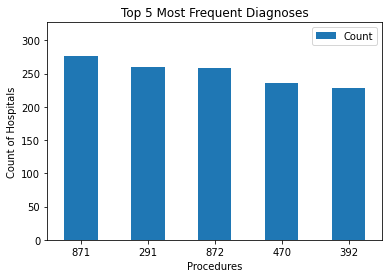

In [7]:
# bar chart showing top 5 most common procedures
count_plot = count_df.plot(kind="bar", rot=0, title='Top 5 Most Frequent Diagnoses')
plt.xlabel("Procedures")
plt.ylabel("Count of Hospitals")
plt.ylim(0, max(counts)+50)
count_plot
plt.savefig('Top 5 Diagnoses')

In [8]:
Census_Cleaned["Zip Code"] = Census_Cleaned["Zip Code"].astype(int)
Medicare_Cost_Total["Zip Code"] = Medicare_Cost_Total["Zip Code"].astype(int)
merged_df = pd.merge(Medicare_Cost_Total, Census_Cleaned, how="inner", on="Zip Code")
merged_df = merged_df.drop([8])
merged_df.head()

,Total Discharges,Total Avg 871,Zip Code,Total Avg 291,Total Avg 872,Total Avg 470,Total Avg 392,Population,Median Age,Per Capita Income
0,97.000000,22186.0,90015,19343.0,15902.0,24933.0,13643.0,20187.0,32.4,31423.0
1,279.000000,16187.0,90017,13153.0,9645.0,18058.0,7357.0,26390.0,30.8,21874.0
2,141.000000,17438.0,90027,13887.0,9169.0,19586.0,8709.0,45616.0,38.0,46196.0
3,628.000000,15828.0,90028,12988.0,9306.0,17425.0,7162.0,31054.0,34.4,32587.0
4,119.666667,26463.0,90033,23416.0,16866.0,21003.0,14192.0,48841.0,30.0,13332.0


In [9]:
def boxplot(data):
    data_quartiles = data.quantile([.25,.5,.75])
    data_lowerq = data_quartiles[0.25]
    data_upperq = data_quartiles[0.75]
    data_iqr = data_upperq-data_lowerq
    data_lower_bound = data_lowerq - (1.5*data_iqr)
    data_upper_bound = data_upperq + (1.5*data_iqr)

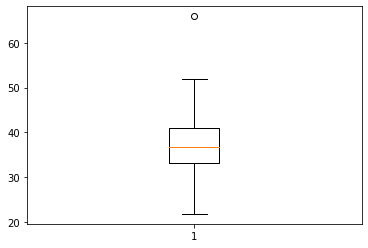

<Figure size 432x288 with 0 Axes>

In [10]:
age = merged_df["Median Age"]
boxplot(age)
plt.boxplot(age)
plt.show()
plt.savefig('Median Age Boxplot with Outliers.png')

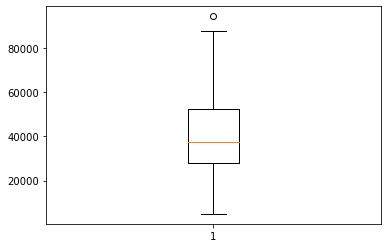

<Figure size 432x288 with 0 Axes>

In [11]:
pop = merged_df["Population"]
boxplot(pop)
plt.boxplot(pop)
plt.show()
plt.savefig('Population Boxplot with Outliers.png')

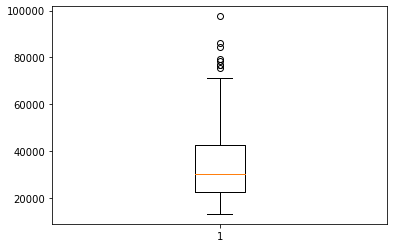

<Figure size 432x288 with 0 Axes>

In [12]:
income = merged_df["Per Capita Income"]
boxplot(income)
plt.boxplot(income)
plt.show()
plt.savefig('Per Capita Income Boxplot with Outliers.png')

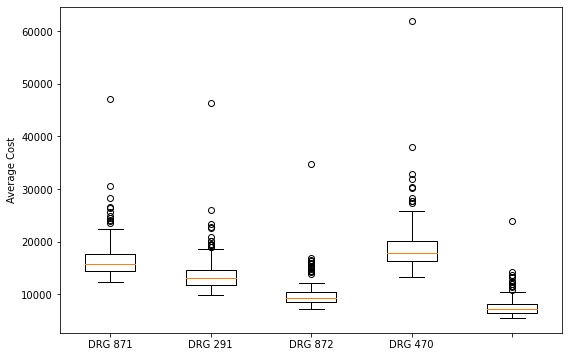

<Figure size 432x288 with 0 Axes>

In [13]:
drg_871 = merged_df["Total Avg 871"]
drg_291 = merged_df["Total Avg 291"]
drg_872 = merged_df["Total Avg 872"]
drg_470 = merged_df["Total Avg 470"]
drg_392 = merged_df["Total Avg 392"]

drg_871_quartiles = drg_871.quantile([.25,.5,.75])
drg_871_lowerq = drg_871_quartiles[0.25]
drg_871_upperq = drg_871_quartiles[0.75]
drg_871_iqr = drg_871_upperq-drg_871_lowerq
drg_871_lower_bound = drg_871_lowerq - (1.5*drg_871_iqr)
drg_871_upper_bound = drg_871_upperq + (1.5*drg_871_iqr)

drg_291_quartiles = drg_291.quantile([.25,.5,.75])
drg_291_lowerq = drg_291_quartiles[0.25]
drg_291_upperq = drg_291_quartiles[0.75]
drg_291_iqr = drg_291_upperq-drg_291_lowerq
drg_291_lower_bound = drg_291_lowerq - (1.5*drg_291_iqr)
drg_291_upper_bound = drg_291_upperq + (1.5*drg_291_iqr)

drg_872_quartiles = drg_872.quantile([.25,.5,.75])
drg_872_lowerq = drg_872_quartiles[0.25]
drg_872_upperq = drg_872_quartiles[0.75]
drg_872_iqr = drg_872_upperq-drg_872_lowerq
drg_872_lower_bound = drg_872_lowerq - (1.5*drg_872_iqr)
drg_872_upper_bound = drg_872_upperq + (1.5*drg_872_iqr)

drg_470_quartiles = drg_470.quantile([.25,.5,.75])
drg_470_lowerq = drg_470_quartiles[0.25]
drg_470_upperq = drg_470_quartiles[0.75]
drg_470_iqr = drg_470_upperq-drg_470_lowerq
drg_470_lower_bound = drg_470_lowerq - (1.5*drg_470_iqr)
drg_470_upper_bound = drg_470_upperq + (1.5*drg_470_iqr)

drg_392_quartiles = drg_392.quantile([.25,.5,.75])
drg_392_lowerq = drg_392_quartiles[0.25]
drg_392_upperq = drg_392_quartiles[0.75]
drg_392_iqr = drg_392_upperq-drg_392_lowerq
drg_392_lower_bound = drg_392_lowerq - (1.5*drg_392_iqr)
drg_392_upper_bound = drg_392_upperq + (1.5*drg_392_iqr)

plot_data = [drg_871, drg_291, drg_872, drg_470, drg_392]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(plot_data)
ax.set_xticklabels(['DRG 871', 'DRG 291', 'DRG 872', 'DRG 470'])
plt.ylabel("Average Cost")
plt.show()
plt.savefig('Top 5 DRG Boxplot with Outliers.png')

In [14]:
out_871 = merged_df.loc[(merged_df["Total Avg 871"]<drg_871_upper_bound)]
out_291 = out_871.loc[(out_871["Total Avg 291"]<drg_291_upper_bound)]
out_872 = out_291.loc[(out_291["Total Avg 872"]<drg_872_upper_bound)]
out_470 = out_872.loc[(out_872["Total Avg 470"]<drg_470_upper_bound)]
Data = out_470.loc[(out_470["Total Avg 392"]<drg_392_upper_bound)]
Data

,Total Discharges,Total Avg 871,Zip Code,Total Avg 291,Total Avg 872,Total Avg 470,Total Avg 392,Population,Median Age,Per Capita Income
1,279.0,16187.0,90017,13153.0,9645.0,18058.0,7357.0,26390.0,30.8,21874.0
2,141.0,17438.0,90027,13887.0,9169.0,19586.0,8709.0,45616.0,38.0,46196.0
3,628.0,15828.0,90028,12988.0,9306.0,17425.0,7162.0,31054.0,34.4,32587.0
5,372.0,13468.0,90036,11017.0,8015.0,16050.0,6068.0,38116.0,34.4,53842.0
6,1224.0,21730.0,90048,16924.0,10737.0,18910.0,9323.0,22860.0,36.7,70123.0
...,...,...,...,...,...,...,...,...,...,...
173,325.0,15265.0,95945,12926.0,8953.0,15925.0,7045.0,25462.0,49.8,30499.0
174,1247.0,13586.0,95966,11342.0,8155.0,15967.0,6020.0,29583.0,42.1,21675.0
175,191.0,13512.0,95969,11305.0,8972.0,15886.0,5872.0,27919.0,50.3,28175.0
176,436.0,14966.0,96001,12310.0,8846.0,16913.0,6521.0,33986.0,43.8,30522.0


In [15]:
def boxplot_clean(x):
    x_quartiles = x.quantile([.25,.5,.75])
    x_lowerq = x_quartiles[0.25]
    x_upperq = x_quartiles[0.75]
    x_iqr = x_upperq-x_lowerq
    x_lower_bound = x_lowerq - (1.5*x_iqr)
    x_upper_bound = x_upperq + (1.5*x_iqr)
    
clean_871 = Data["Total Avg 871"]
clean_291 = Data["Total Avg 291"]
clean_872 = Data["Total Avg 872"]
clean_470 = Data["Total Avg 470"]
clean_392 = Data["Total Avg 392"]

boxplot_clean(clean_871)
boxplot_clean(clean_291)
boxplot_clean(clean_872)
boxplot_clean(clean_470)
boxplot_clean(clean_392)

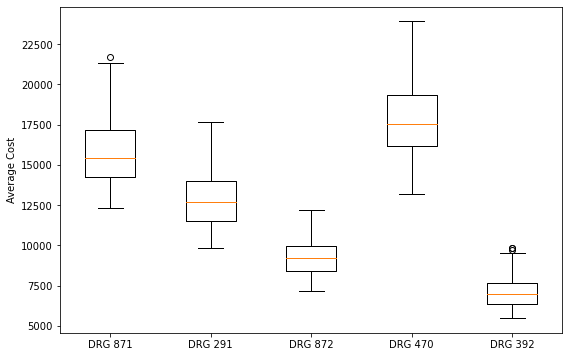

<Figure size 432x288 with 0 Axes>

In [16]:
plot_data = [clean_871, clean_291, clean_872, clean_470, clean_392]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(plot_data)
ax.set_xticklabels(['DRG 871', 'DRG 291', 'DRG 872', 'DRG 470', 'DRG 392'])
plt.ylabel("Average Cost")
plt.show()
plt.savefig('Top 5 DRG Boxplot.png')

In [17]:
Data["Total"] = Data["Total Avg 871"] + Data["Total Avg 291"] + Data["Total Avg 872"] + Data["Total Avg 470"] + Data["Total Avg 392"]
Data.head(10)

,Total Discharges,Total Avg 871,Zip Code,Total Avg 291,Total Avg 872,Total Avg 470,Total Avg 392,Population,Median Age,Per Capita Income,Total
1,279.0,16187.0,90017,13153.0,9645.0,18058.0,7357.0,26390.0,30.8,21874.0,64400.0
2,141.0,17438.0,90027,13887.0,9169.0,19586.0,8709.0,45616.0,38.0,46196.0,68789.0
3,628.0,15828.0,90028,12988.0,9306.0,17425.0,7162.0,31054.0,34.4,32587.0,62709.0
5,372.0,13468.0,90036,11017.0,8015.0,16050.0,6068.0,38116.0,34.4,53842.0,54618.0
6,1224.0,21730.0,90048,16924.0,10737.0,18910.0,9323.0,22860.0,36.7,70123.0,77624.0
7,344.0,19860.0,90057,15790.0,10861.0,18605.0,8452.0,49389.0,34.1,15492.0,73568.0
9,240.0,14898.0,90241,12069.0,8923.0,16775.0,6749.0,44097.0,35.6,25576.0,59414.0
10,135.0,12567.0,90291,10451.0,7249.0,15134.0,6308.0,27170.0,38.4,71411.0,51709.0
11,612.0,14487.0,90301,12241.0,8888.0,17108.0,6779.0,37518.0,33.7,18999.0,59503.0
12,425.0,17599.0,90404,13135.0,9025.0,16782.0,6708.0,22586.0,37.9,45565.0,63249.0


In [18]:
def Scatter (x, y):
    slope, intercept, r, p, std_err = st.linregress(Data[x], Data[y])
    plt.scatter(Data[x], Data[y], marker="o", color="blue", alpha = 0.25)
    plt.xlabel(x)
    plt.title(f"{x} compared to Average Hospital costs")
    plt.ylabel("Average Cost")
    PCI_Line = slope* Data[x] + intercept
    plt.plot(Data[x], PCI_Line, "r-")
    
    
    total_y = Data.loc[:,y]
    total_x = Data.loc[:,x]
    
    t_test = st.ttest_ind(total_x, total_y)
    
    
    corr = st.pearsonr(total_x, total_y)
    plt.annotate(f"The r value is {round(corr[0], 2)}",xy=(.6, .85), xycoords='figure fraction', fontsize=11,color="b")
    plt.annotate(f"The p value is {round(corr[1], 2)}",xy=(.6, .8), xycoords='figure fraction',fontsize=11,color="b")
    plt.annotate(f"The t-statistic is {round(t_test[0], 2)}",xy=(.6, .75), xycoords='figure fraction',fontsize=11,color="b")
    
    plt.show

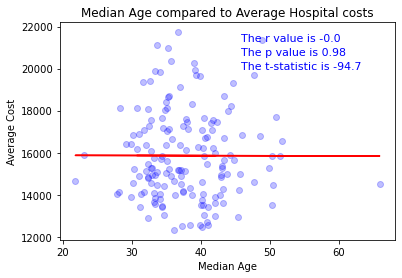

In [19]:
Scatter_Age_871 = Scatter("Median Age", "Total Avg 871")
plt.savefig("Scatter_Age_871.PNG")

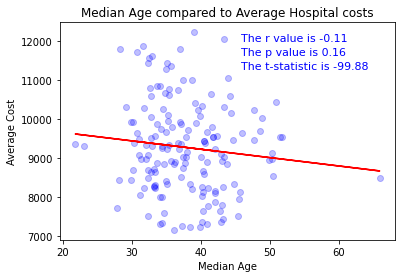

In [20]:
Scatter_Age_872 = Scatter("Median Age", "Total Avg 872")
plt.savefig("Scatter_Age_872.PNG")

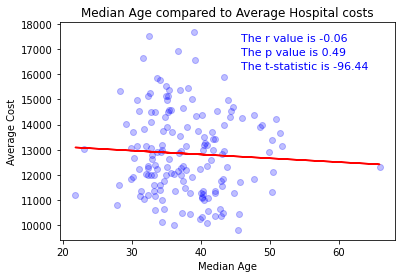

In [21]:
Scatter_Age_291 = Scatter("Median Age", "Total Avg 291")
plt.savefig("Scatter_Age_291.PNG")

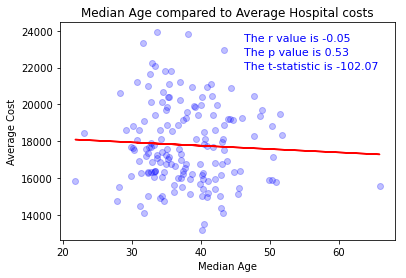

In [22]:
Scatter_Age_470 = Scatter("Median Age", "Total Avg 470")
plt.savefig("Scatter_Age_470.PNG")

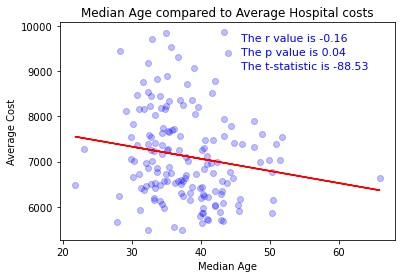

In [23]:
Scatter_Age_392 = Scatter("Median Age", "Total Avg 392")
plt.savefig("Scatter_Age_392.PNG")

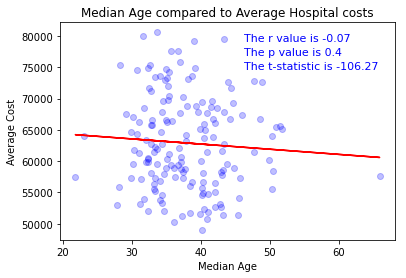

In [24]:
Scatter_Age_Total = Scatter("Median Age", "Total")
plt.savefig("Scatter_Age_Total.PNG")

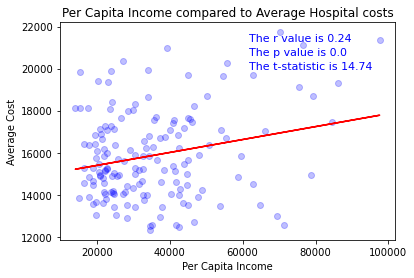

In [25]:
Scatter_PCI_871 = Scatter("Per Capita Income", "Total Avg 871")
plt.savefig("Scatter_PCI_871.PNG")

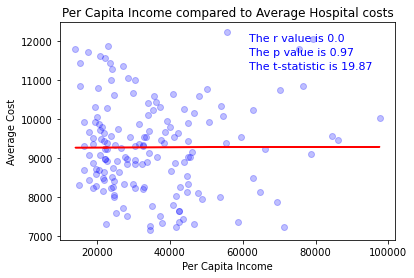

In [26]:
Scatter_PCI_872 = Scatter("Per Capita Income", "Total Avg 872")
plt.savefig("Scatter_PCI_872.PNG")

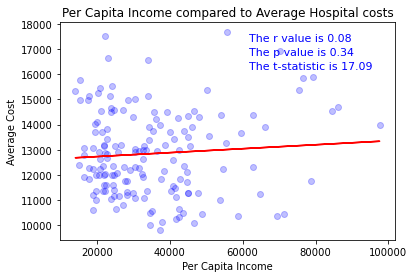

In [27]:
Scatter_PCI_291 = Scatter("Per Capita Income", "Total Avg 291")
plt.savefig("Scatter_PCI_291.PNG")

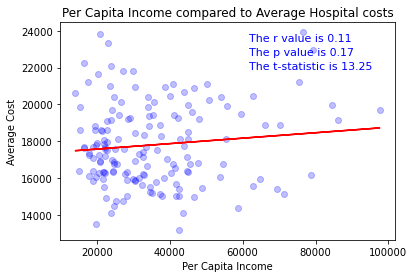

In [28]:
Scatter_PCI_470 = Scatter("Per Capita Income", "Total Avg 470")
plt.savefig("Scatter_PCI_470.PNG")

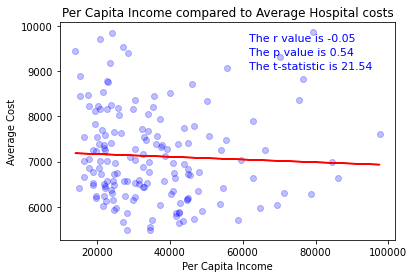

In [29]:
Scatter_PCI_392 = Scatter("Per Capita Income", "Total Avg 392")
plt.savefig("Scatter_PCI_392.PNG")

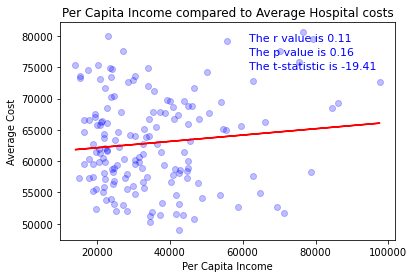

In [30]:
Scatter_PCI_Total = Scatter("Per Capita Income", "Total")
plt.savefig("Scatter_PCI_Total.PNG")

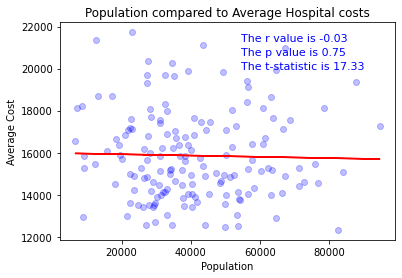

In [31]:
Scatter_Pop_871 = Scatter("Population", "Total Avg 871")
plt.savefig("Scatter_Pop_871.PNG")

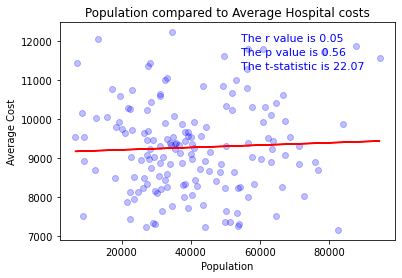

In [32]:
Scatter_Pop_872 = Scatter("Population", "Total Avg 872")
plt.savefig("Scatter_Pop_872.PNG")

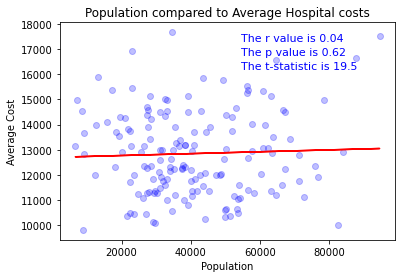

In [33]:
Scatter_Pop_291 = Scatter("Population", "Total Avg 291")
plt.savefig("Scatter_Pop_291.PNG")

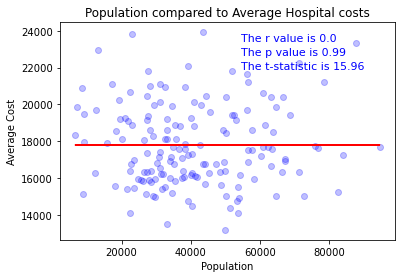

In [34]:
Scatter_Pop_470 = Scatter("Population", "Total Avg 470")
plt.savefig("Scatter_Pop_470.PNG")

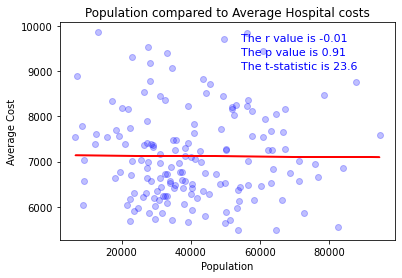

In [35]:
Scatter_Pop_392 = Scatter("Population", "Total Avg 392")
plt.savefig("Scatter_Pop_392.PNG")

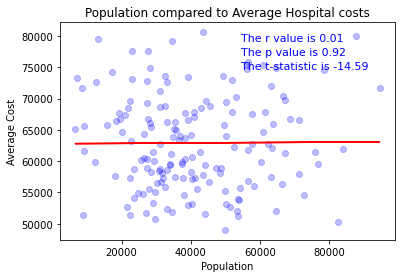

In [36]:
Scatter_Pop_Total = Scatter("Population", "Total")
plt.savefig("Scatter_Pop_Total.PNG")

In [37]:
###Presentation